In [ ]:
# Unzip images to a custom data folder
!unzip -q /content/data.zip -d /content/custom_data

In [ ]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

--2025-10-04 16:44:10--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-10-04 16:44:10 (63.7 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 1068
Number of annotation files: 1068
Images moving to train: 961
Images moving to validation: 107


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.7 MB/s eta 0:00:00


In [ ]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 10
names:
- ALAPADMAM
- ARALAM
- CHANDRAKALA
- GARUDA
- KAPOTHAM
- KARKATTA
- MATSYA
- MUSHTI
- PATHAKA
- SUCHI


In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=40 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,416,670 parameters, 0 gradients, 21.3 GFLOPs

image 1/107 /content/data/validation/images/04b78610-Aralam_36.jpg: 480x640 1 ARALAM, 52.5ms
image 2/107 /content/data/validation/images/050152cd-Karkatta__146.jpg: 480x640 1 KARKATTA, 12.4ms
image 3/107 /content/data/validation/images/059c2258-Matsya___126.jpg: 480x640 1 MATSYA, 12.3ms
image 4/107 /content/data/validation/images/06b60800-Alapadmam_91.jpg: 480x640 1 ALAPADMAM, 12.3ms
image 5/107 /content/data/validation/images/070a69b3-Kapotham_207.jpg: 480x640 1 KAPOTHAM, 12.3ms
image 6/107 /content/data/validation/images/0769c996-Garuda___37.jpg: 480x640 1 GARUDA, 12.3ms
image 7/107 /content/data/validation/images/08edcab9-Matsya___86.jpg: 480x640 1 MATSYA, 12.3ms
image 8/107 /content/data/validation/images/0c83fe2a-Garuda___42.jpg: 480x640 1 GARUDA, 12.3ms
image 9/107 /content/data/validation/images/1365aa80-Kapotham_

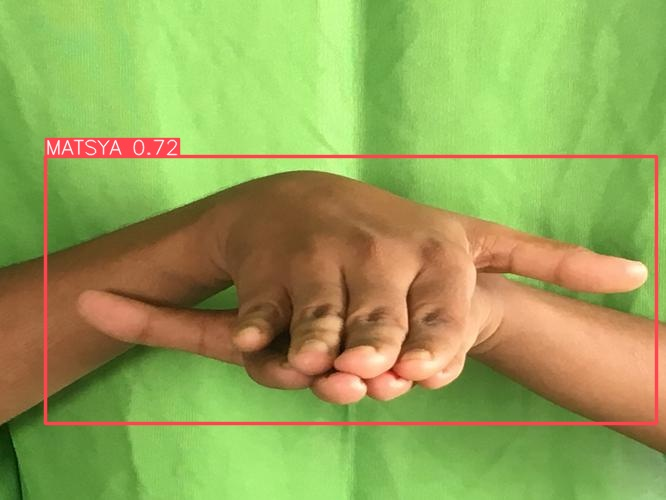

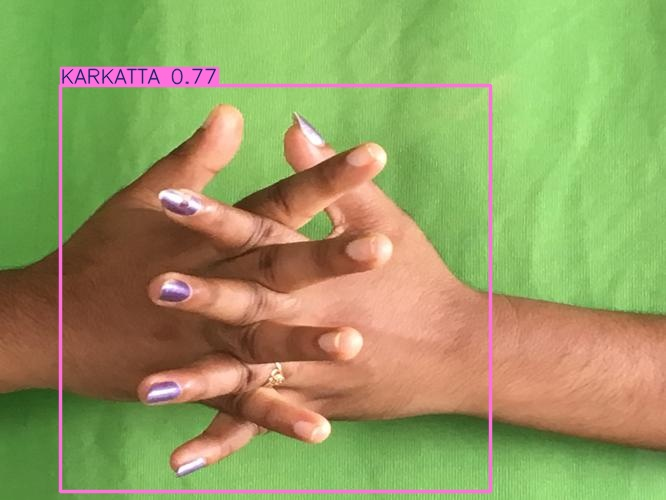

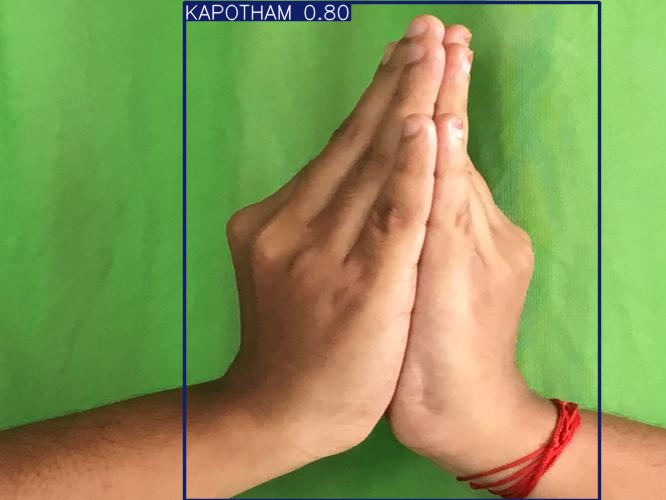

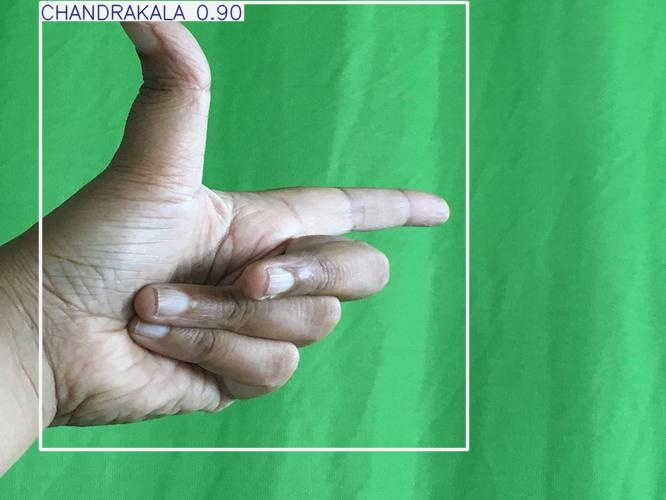

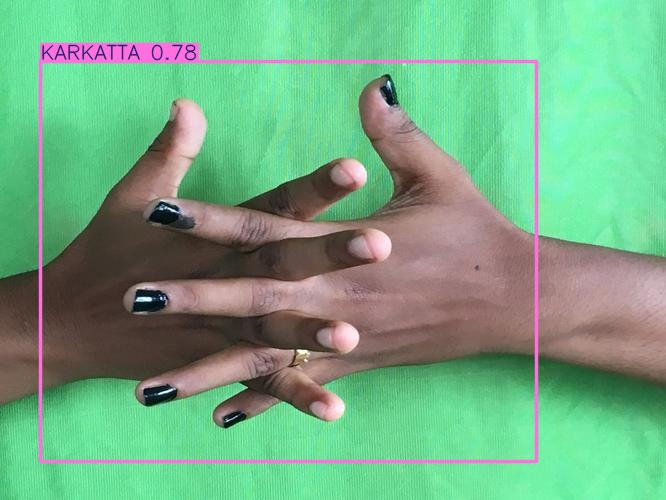

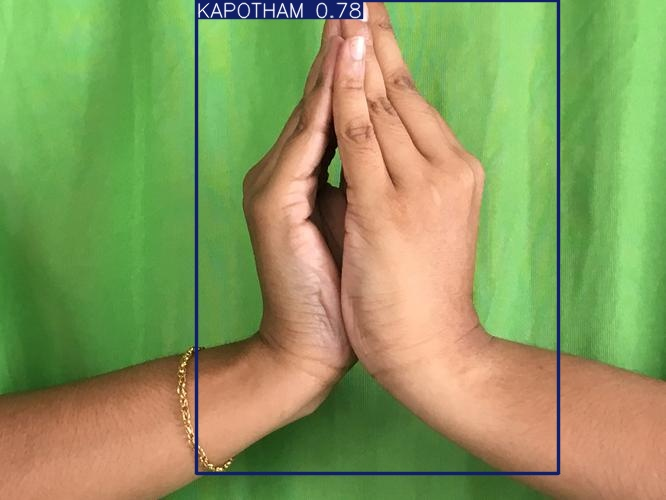

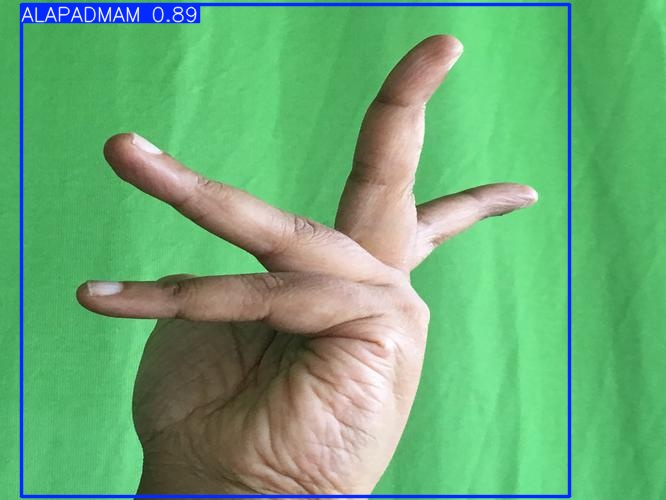

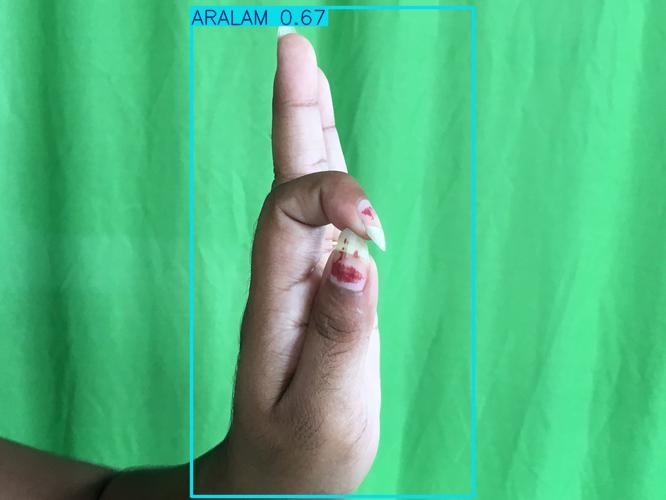

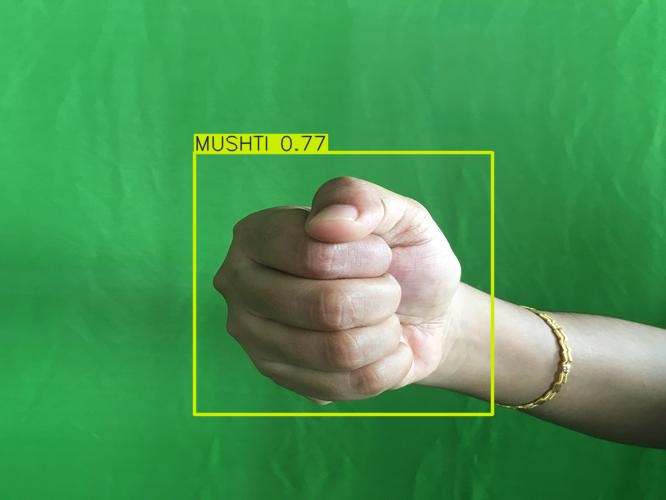

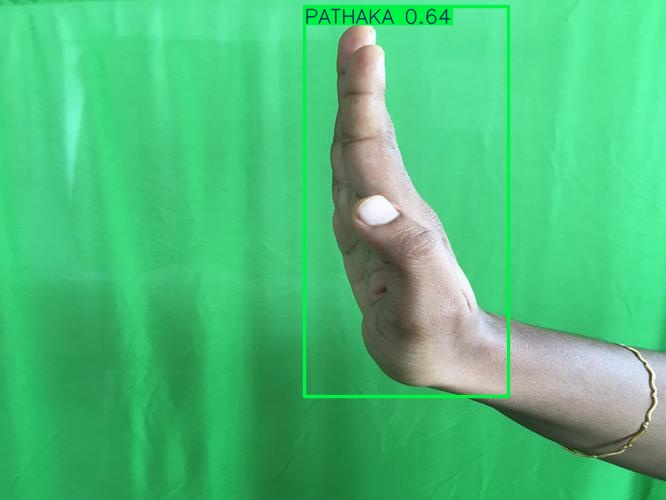

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/results.csv (deflated 61%)
  adding: train/labels.jpg (deflated 29%)
  adding: train/args.yaml (deflated 53%)
  adding: train/results.png (deflated 7%)
  adding: train/BoxPR_curve.png (deflated 18%)
  adding: train/train_batch1832.jpg (deflated 16%)
  adding: train/val_batch1_labels.jpg (deflated 9%)
  adding: train/train_batch1831.jpg (deflated 14%)
  adding: train/val_batch0_pred.jpg (deflated 10%)
  adding: train/val_batch1_pred.jpg (deflated 9%)
  adding: train/train_batch1830.jpg (deflated 13%)
  adding: train/train_batch2.jpg (deflated 6%)
  adding: train/BoxP_curve.png (deflated 13%)
  adding: train/val_batch2_labels.jpg (deflated 10%)
  adding: train/train_batch1.jpg (deflated 6%)
  adding: train/train_batch0.jpg (deflated 7%)
  adding: train/confusion_matrix_normalized.png (deflated 22%)
  adding: train/val_batch0_labels.jpg (deflated 10%)
  adding: train/BoxR_curve.png (deflated

In [ ]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>